In [3]:
#导入相关包
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
#设置sns样式
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt
#导入数据
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [4]:
#分别查看实验数据集和预测数据集数据
print('实验数据大小:',train.shape)
print('预测数据大小:',test.shape)

实验数据大小: (891, 12)
预测数据大小: (418, 11)


In [8]:
#将实验数据和预测数据合并
full=train._append(test,ignore_index=True)
full.info()
full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Embarked', ylabel='Survived'>

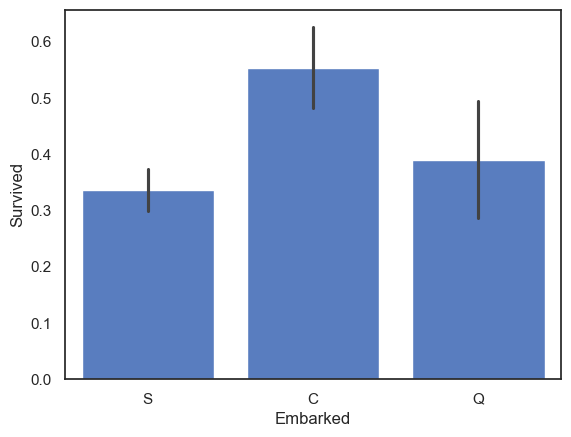

In [9]:
sns.barplot(data=train,x='Embarked',y='Survived')

In [10]:
#计算不同类型embarked的乘客，其生存率为多少
print('Embarked为"S"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='S'].value_counts(normalize=True)[1])
print('Embarked为"C"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='C'].value_counts(normalize=True)[1])
print('Embarked为"Q"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='Q'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.34
Embarked为"C"的乘客，其生存率为0.55
Embarked为"Q"的乘客，其生存率为0.39


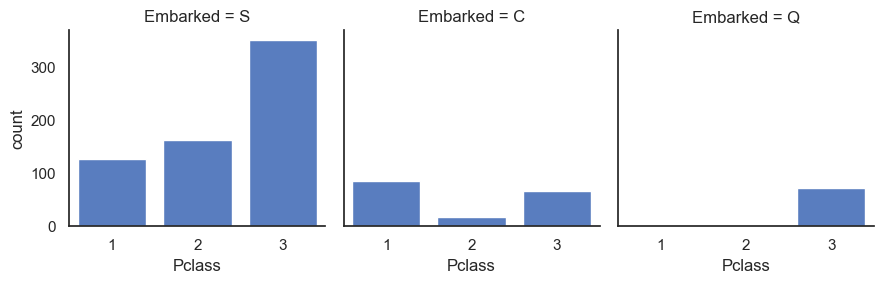

In [26]:
#法国登船乘客生存率较高原因可能与其头等舱乘客比例较高有关
sns.catplot(x='Pclass',data=train,col='Embarked',kind='count',height=3)

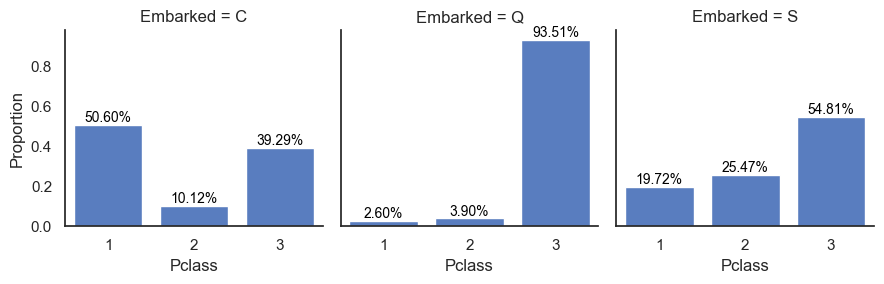

In [33]:
# 计算每个Embarked类别内Pclass的比例
proportions = train.groupby(['Embarked', 'Pclass']).size().unstack()
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# 重塑数据以适应barplot
proportions = proportions.stack().reset_index(name='Proportion')

# 绘制图表
g = sns.catplot(x='Pclass', y='Proportion', col='Embarked', data=proportions, kind='bar', height=3)

# 显示具体的数字
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [35]:
# 计算每个Embarked类别内Pclass的比例
proportions = train.groupby(['Embarked', 'Pclass']).size().unstack()
a=train.groupby(['Embarked','Pclass'])
print(f"row: 3 - col: 1 a -> {a}")
b=a.size()
print(f"{b}")
c=b.unstack()
print(f"{c}")
# proportions = proportions.div(proportions.sum(axis=1), axis=0)

# # 重塑数据以适应barplot
# proportions = proportions.stack().reset_index(name='Proportion')

row: 3 - col: 1 a -> <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000024078AB2C40>
Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64
Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


<Axes: xlabel='Parch', ylabel='Survived'>

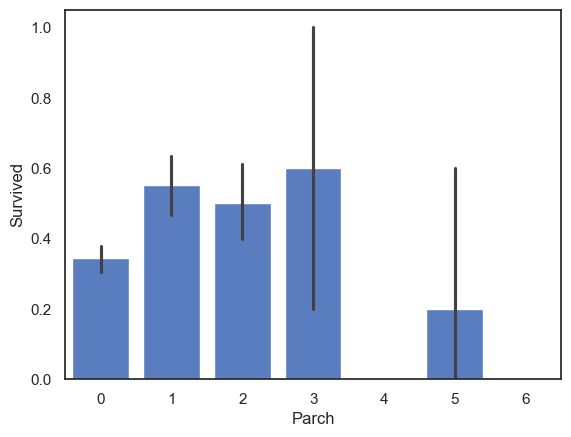

In [36]:
sns.barplot(data=train,x='Parch',y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

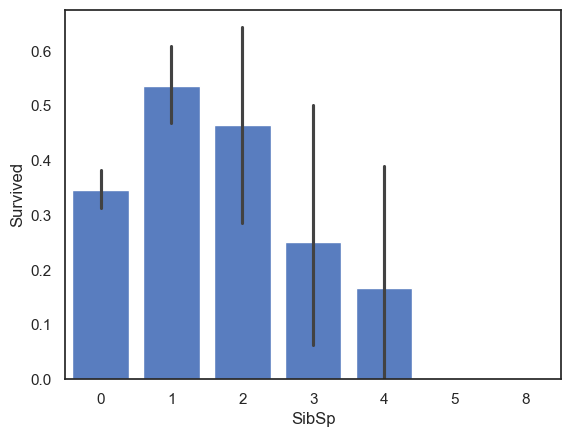

In [37]:
sns.barplot(data=train,x='SibSp',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

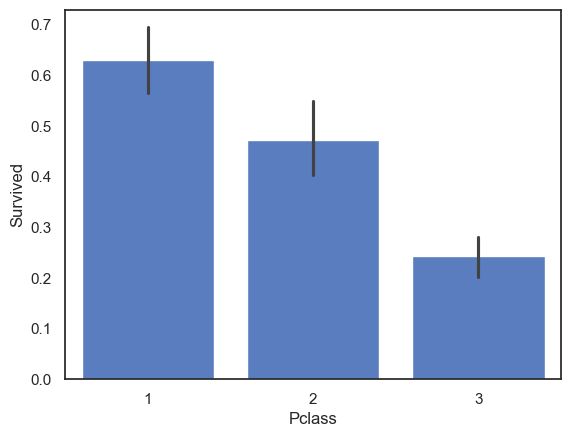

In [38]:
sns.barplot(data=train,x='Pclass',y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

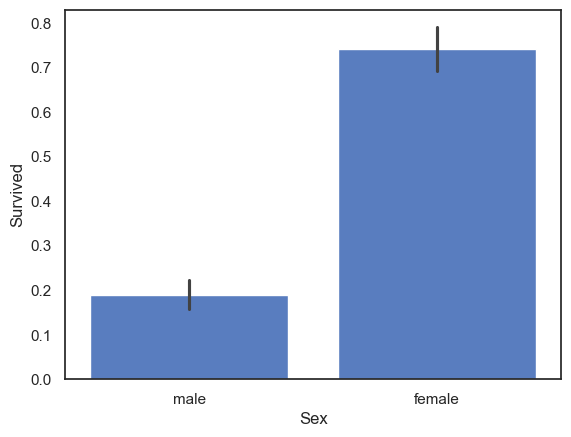

In [39]:
sns.barplot(data=train,x='Sex',y='Survived')

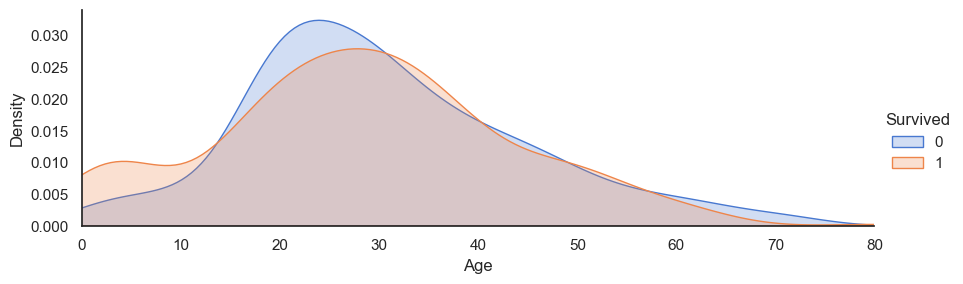

In [40]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

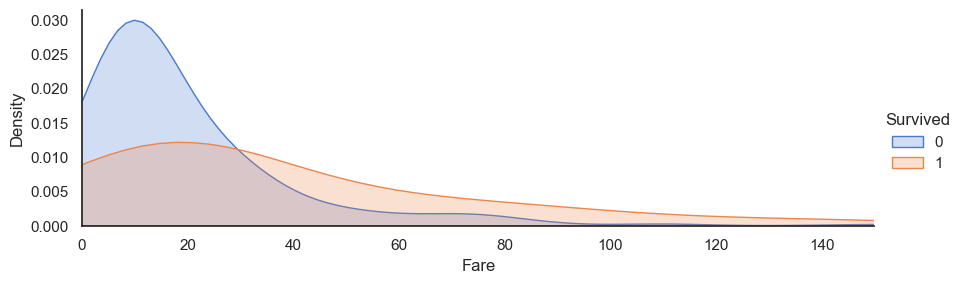

In [41]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

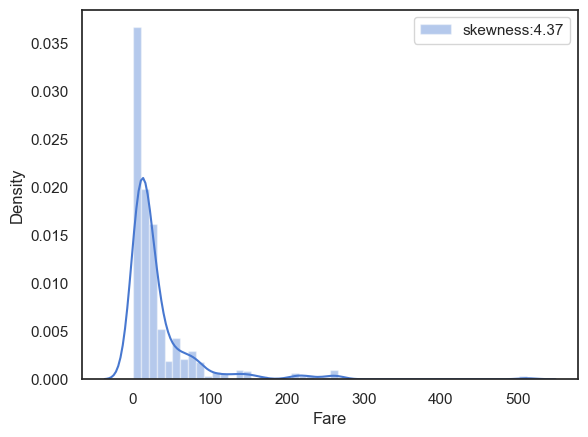

In [42]:
#查看fare分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')